
|- | Attribute Name | Meaning |
|:---| :--- |:--- |
| 1 | Age | Employee's age |
| 2 | Gender | Employee's Gender |
| 3 | BusinessTravel | Frequency of employees' business trips |
| 4 | DailyRate | Daily salary rate for employees |
| 5 | Department | Office of employees |
| 6 | DistanceFromHome | Distance from home in miles to work |
| 7 | Education | Level of education achieved by staff |
| 8 | EducationField | Employee's field of study |
| 9 | EmployeeCount | Total number of employees in the organization |
| 10 | EmployeeNumber | A unique identifier for each employee record |
| 11 | EnvironmentSatisfaction | Employee satisfaction with their working environment |
| 12 | HourlyRate | Hourly rate for employees |
| 13 | JobInvolvement | Level of involvement required for the employee's job |
| 14 | JobLevel | Employee's level of work |
| 15 | JobRole | The role of employees in the organization |
| 16 | JobSatisfaction | Employee satisfaction with their work |
| 17 | MaritalStatus | Employee's marital status |
| 18 | MonthlyIncome | Employee's monthly income |
| 19 | MonthlyRate | Monthly salary rate for employees |
| 20 | NumCompaniesWorked | Number of companies the employee worked for |
| 21 | Over18 | Whether the employee is over 18 years old |
| 22 | OverTime | Do employees work overtime |
| 23 | PercentSalaryHike | Salary increase rate for employees |
| 24 | PerformanceRating | The performance rating of the employee |
| 25 | RelationshipSatisfaction | Employee satisfaction with their relationships |
| 26 | StandardHours | Standard working hours for employees |
| 27 | StockOptionLevel | Employee stock option level |
| 28 | TotalWorkingYears | Total number of years the employee has worked |
| 29 | TrainingTimesLastYear | Number of times employees were taken to training in the last year |
| 30 | WorkLifeBalance | Employees' perception of their work-life balance |
| 31 | YearsAtCompany | Number of years employees have been with the company |
| 32 | YearsInCurrentRole | Number of years the employee has been in their current role |
| 33 | YearsSinceLastPromotion | Number of years since employee's last promotion |
| 34 | YearsWithCurrManager | Number of years an employee has been with their current manager |
| 35 | Attrition | Does the employee leave the organization |

### meaning of classifications

- Education:
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

- EnvironmentSatisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- JobSatisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- PerformanceRating:
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

- RelationshipSatisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- WorkLifeBalance:
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
from plotly.offline import iplot
from warnings import filterwarnings

filterwarnings("ignore")

# Loading Dataset

In [6]:
df = pd.read_csv('C:/Users/tabark/Desktop/DEPI_Proj/Data&Code/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
df1 = df.select_dtypes('object')
df1

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [11]:
df2 = df.select_dtypes('int64')
df2

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [12]:
df1.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [13]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [14]:
df.isnull().sum().sum()

np.int64(0)

In [15]:
df.duplicated().sum()

np.int64(0)

# **There is no missing value and duplicate rows in dataset.**
    
Some of columns can be **removed**,  because their values do not affect the analysis results.
1. Over18: All values are Y
2. EmployeeCount: all values are 1.0
3. StandardHours: all values are 80.0
4. EmployeeNumber: is the id of the employee that their values do not affect the analysis results.

In [17]:
# remove 4 columns (from total data).
df = df.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

# Discovering Relationships in Data

In [19]:
# to separate categorical and numerical columns
cat = df.select_dtypes(['object']).columns
num = df.select_dtypes(['number']).columns
print(cat)
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [20]:
for i in cat:
    print('Unique values of ', i, set(df[i]))

Unique values of  Attrition {'Yes', 'No'}
Unique values of  BusinessTravel {'Travel_Frequently', 'Non-Travel', 'Travel_Rarely'}
Unique values of  Department {'Research & Development', 'Human Resources', 'Sales'}
Unique values of  EducationField {'Human Resources', 'Other', 'Technical Degree', 'Medical', 'Life Sciences', 'Marketing'}
Unique values of  Gender {'Female', 'Male'}
Unique values of  JobRole {'Human Resources', 'Research Scientist', 'Sales Executive', 'Laboratory Technician', 'Research Director', 'Sales Representative', 'Manufacturing Director', 'Healthcare Representative', 'Manager'}
Unique values of  MaritalStatus {'Married', 'Divorced', 'Single'}
Unique values of  OverTime {'Yes', 'No'}


In [46]:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"#ffffff"})
sns.set_palette("pastel")

# Define custom orders for specific categorical variables
custom_orders = {
    'Attrition': ['No', 'Yes'],
    'Gender': ['Male', 'Female'],
    'OverTime': ['No', 'Yes'],
    'MaritalStatus': ['Married', 'Single', 'Divorced'],
    'BusinessTravel': ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'],
    'Department': ['Research & Development', 'Sales', 'Human Resources'],
    'EducationField': ['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources', 'Other'],
    'JobRole': ['Research Scientist', 'Sales Executive', 'Laboratory Technician', 'Manufacturing Director', 
                'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']
}

# First display count summary for all categorical variables
print("CATEGORICAL VARIABLE COUNTS SUMMARY")
print("=" * 50)
for col in cat:
    print(f"\n{col} Counts:")
    counts = df[col].value_counts().sort_values(ascending=False)
    count_df = pd.DataFrame({
        'Category': counts.index,
        'Count': counts.values,
        'Percentage': (counts.values / len(df) * 100).round(2)
    })
    print(count_df.to_string(index=False))
    print("-" * 50)


CATEGORICAL VARIABLE COUNTS SUMMARY

Attrition Counts:
Category  Count  Percentage
      No   1233       83.88
     Yes    237       16.12
--------------------------------------------------

BusinessTravel Counts:
         Category  Count  Percentage
    Travel_Rarely   1043       70.95
Travel_Frequently    277       18.84
       Non-Travel    150       10.20
--------------------------------------------------

Department Counts:
              Category  Count  Percentage
Research & Development    961       65.37
                 Sales    446       30.34
       Human Resources     63        4.29
--------------------------------------------------

EducationField Counts:
        Category  Count  Percentage
   Life Sciences    606       41.22
         Medical    464       31.56
       Marketing    159       10.82
Technical Degree    132        8.98
           Other     82        5.58
 Human Resources     27        1.84
--------------------------------------------------

Gender Counts:
Categ

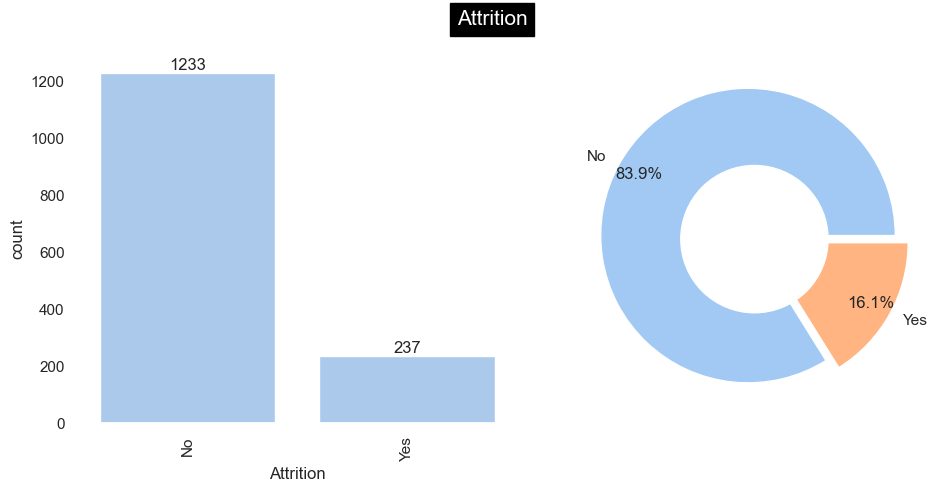

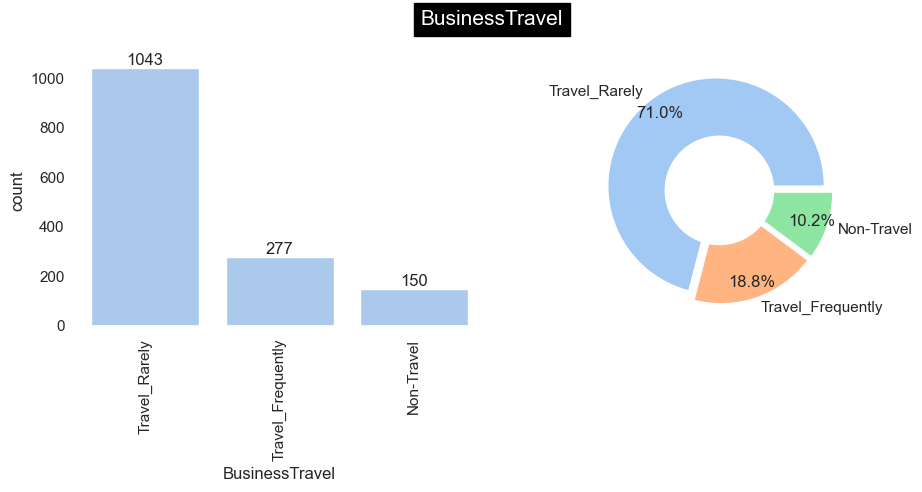

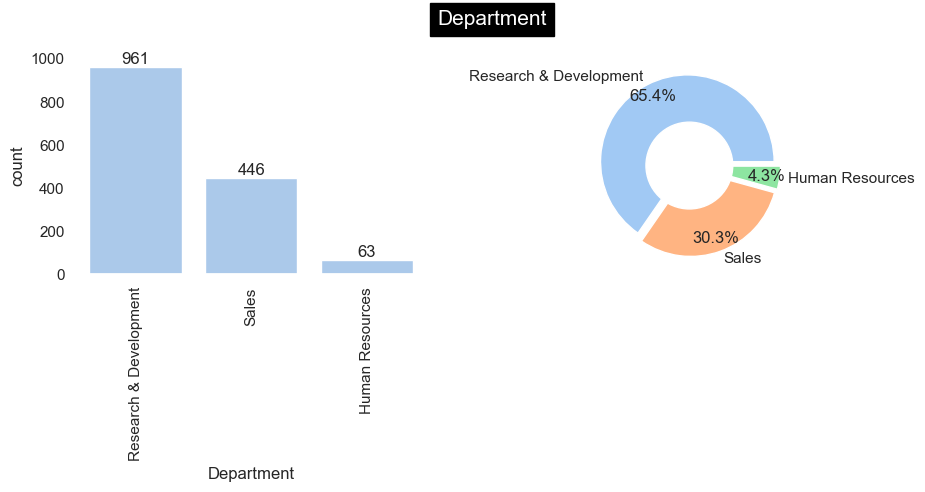

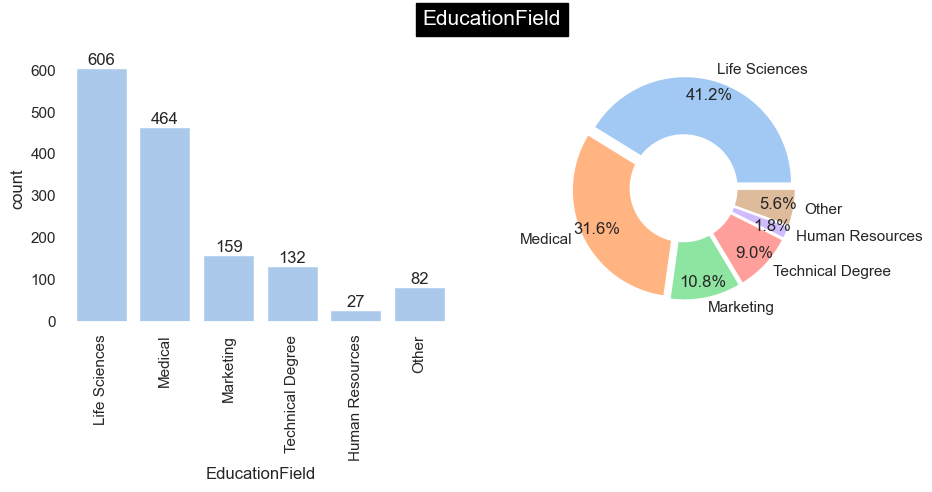

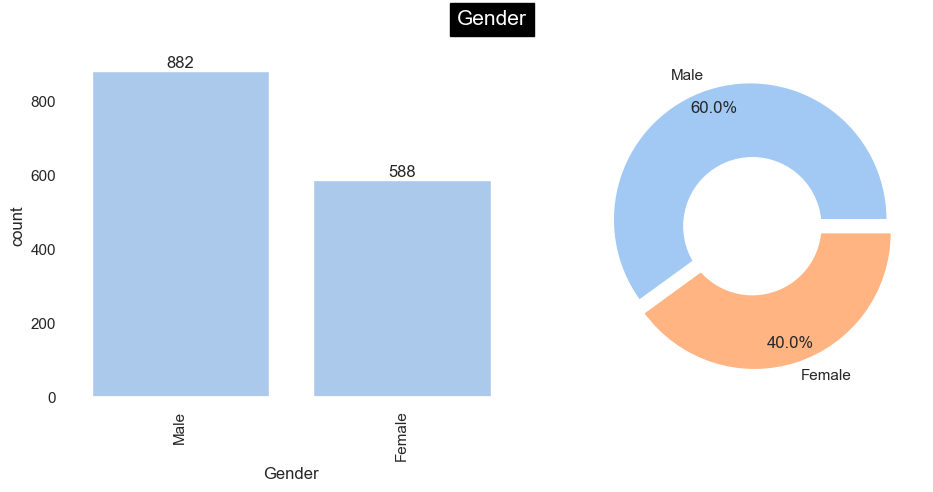

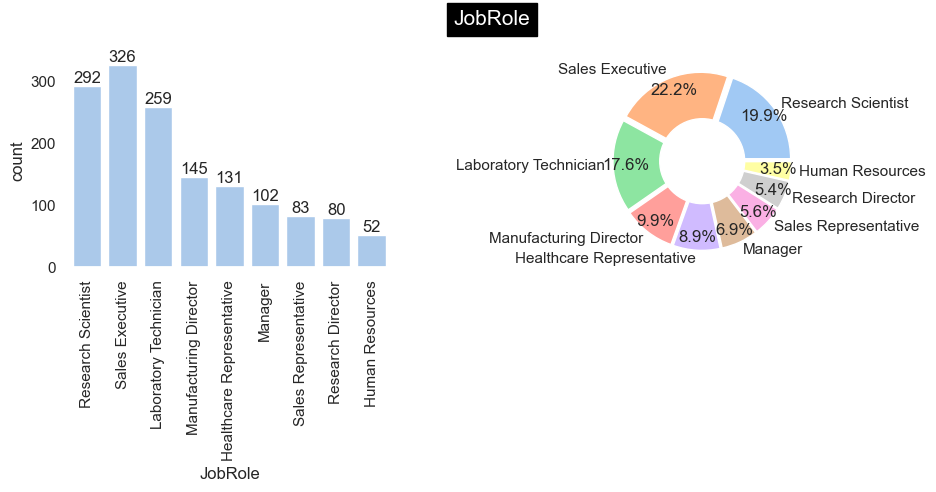

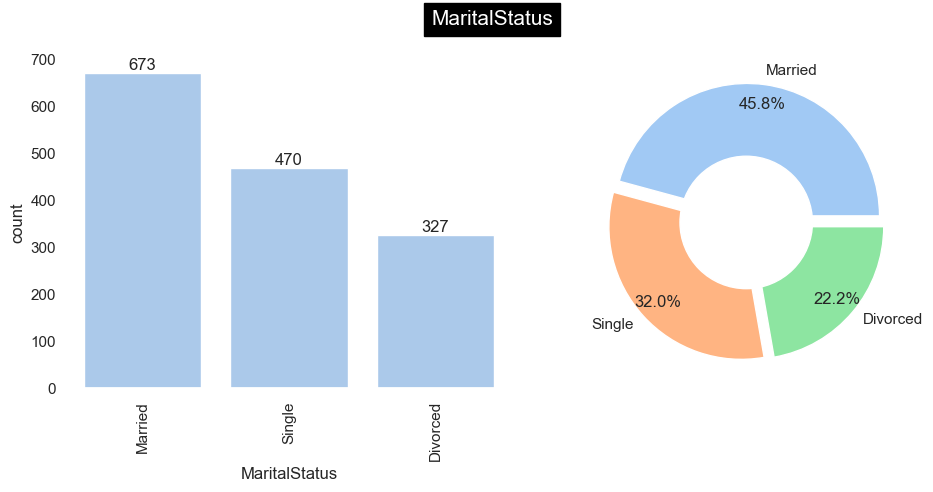

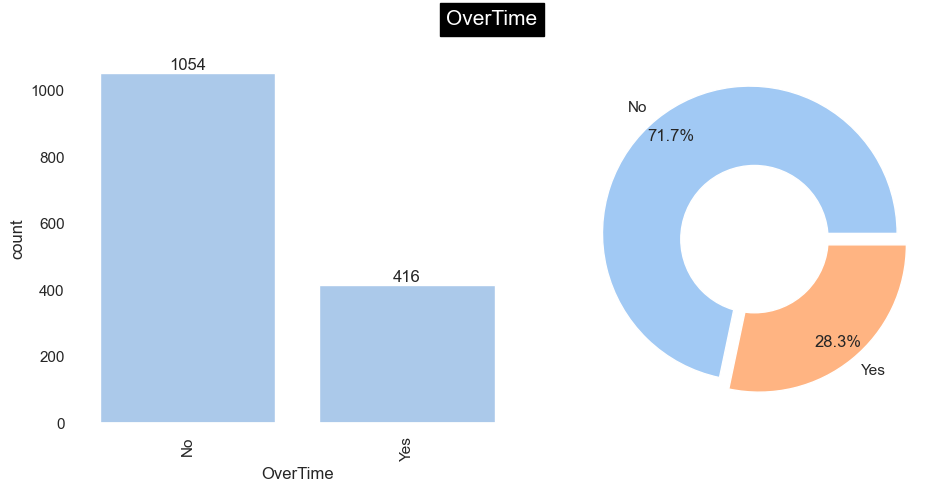

In [48]:
# Now proceed with the visualizations
for i, col in enumerate(cat):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Determine the appropriate order for this column
    if col in custom_orders:
        # Use predefined order
        order = custom_orders[col]
    else:
        # Default to frequency order (highest to lowest)
        order = df[col].value_counts().index.tolist()
    
    # Create countplot with the specified order
    ax = sns.countplot(data=df, x=col, ax=axes[0], order=order)
    ax.set_xticklabels(order, rotation=90)
    
    # Add count labels
    for container in axes[0].containers:
        axes[0].bar_label(container)
    
    # Pie chart with the same order
    if col in custom_orders:
        # Use our custom order
        ordered_counts = df[col].value_counts().reindex(order)
        index = ordered_counts.index
        size = ordered_counts.values
    else:
        # For others, use value count order
        index = df[col].value_counts().index
        size = df[col].value_counts().values
    
    # Make sure explode is the right size
    explode = tuple(0.05 for _ in range(len(index)))
    
    # Create pie chart
    axes[1].pie(size, labels=index, autopct='%1.1f%%', pctdistance=0.85, explode=explode)
    
    # Inner circle
    centre_circle = plt.Circle((0,0), 0.50, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.suptitle(col, backgroundcolor='black', color='white', fontsize=15)
    
    plt.tight_layout()
    plt.show()

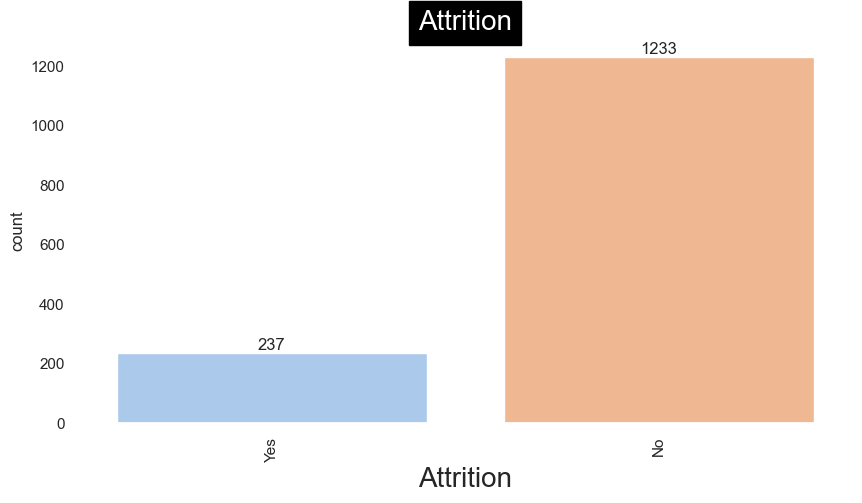

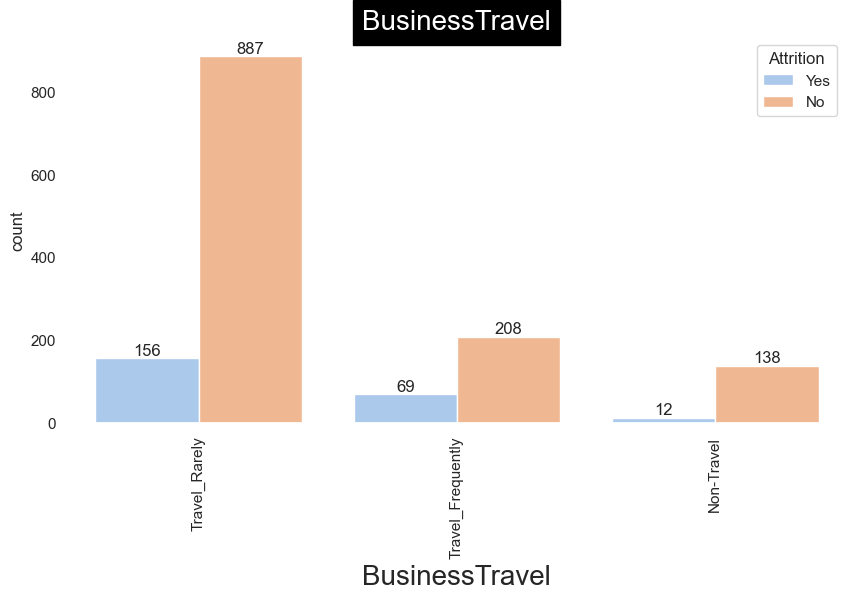

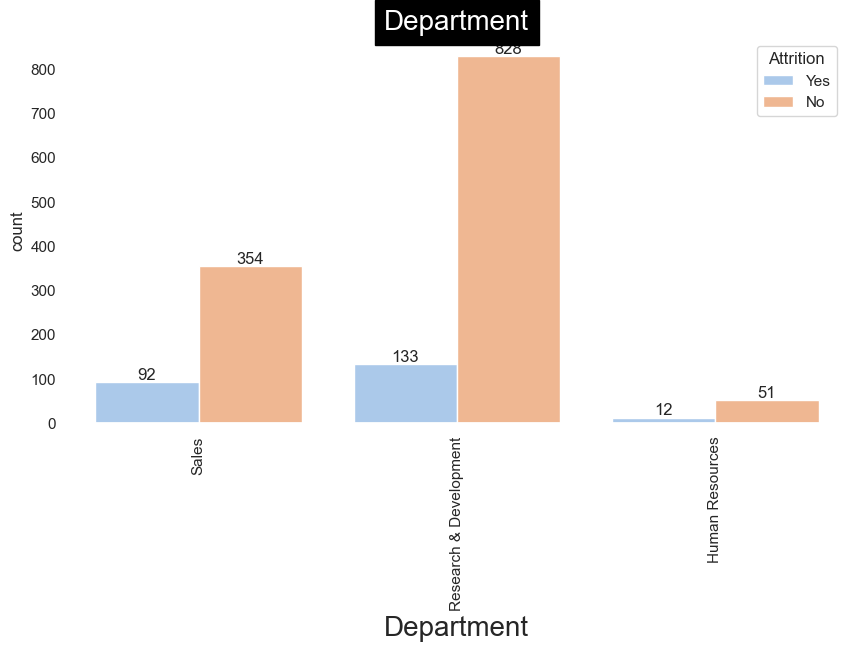

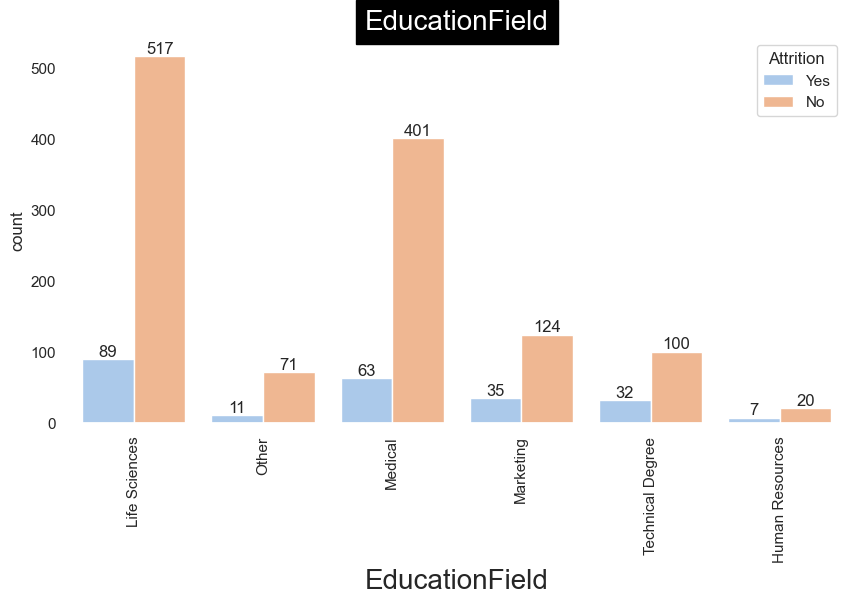

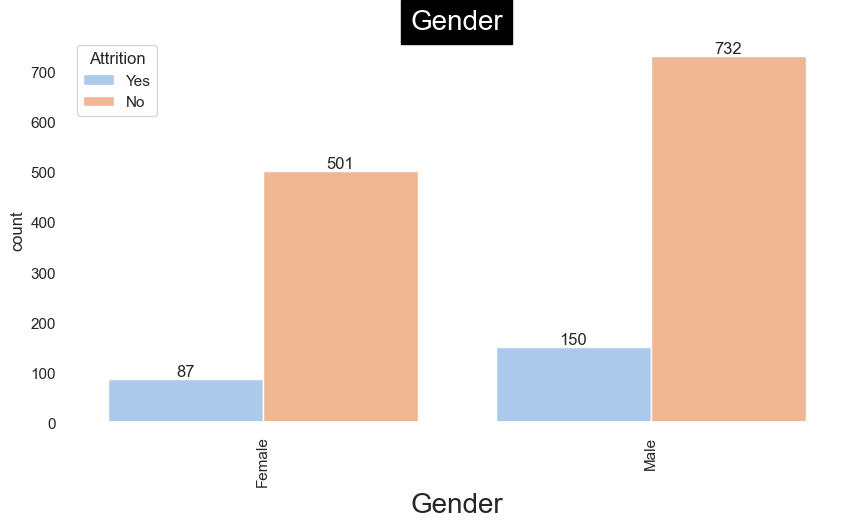

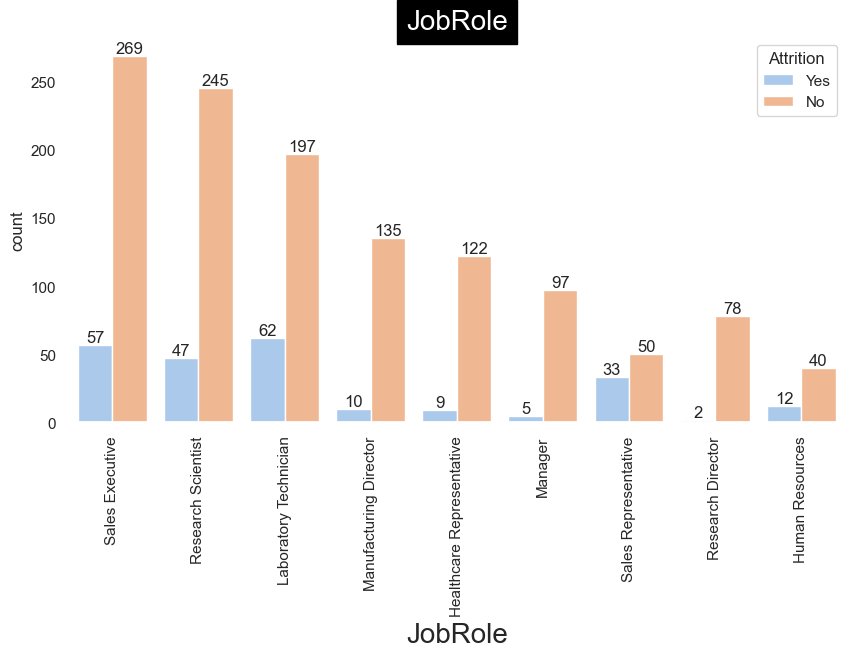

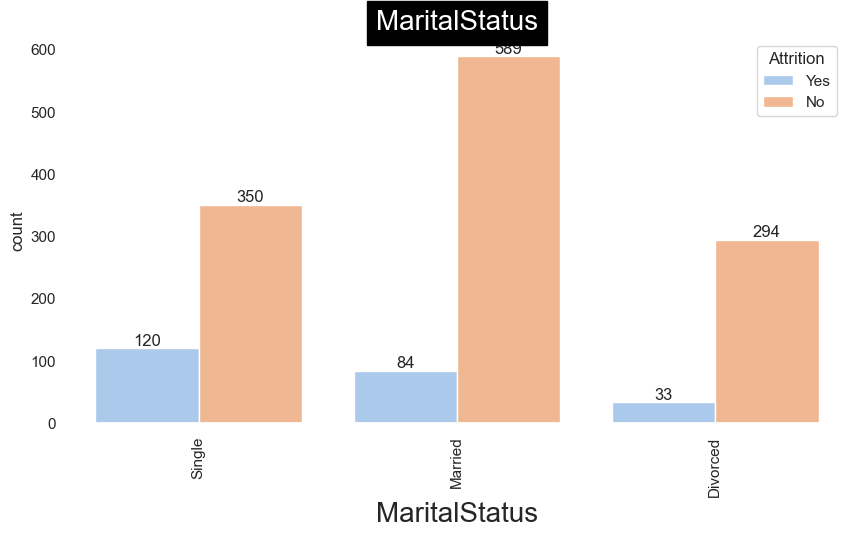

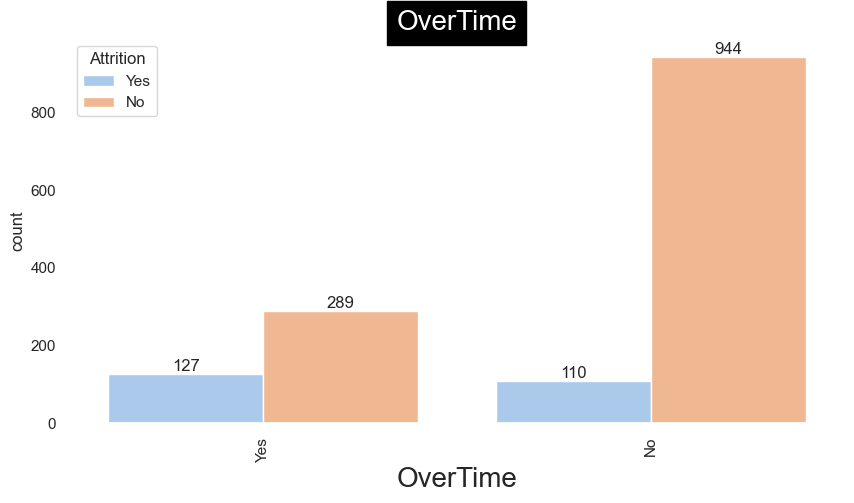

In [22]:
for column in cat : 
    plt.figure(figsize=(10,5))
    
    ax=sns.countplot(x=df[column], data=df,hue="Attrition")
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(column,backgroundcolor='black',color='white',fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=20)
    plt.grid()
    plt.show()

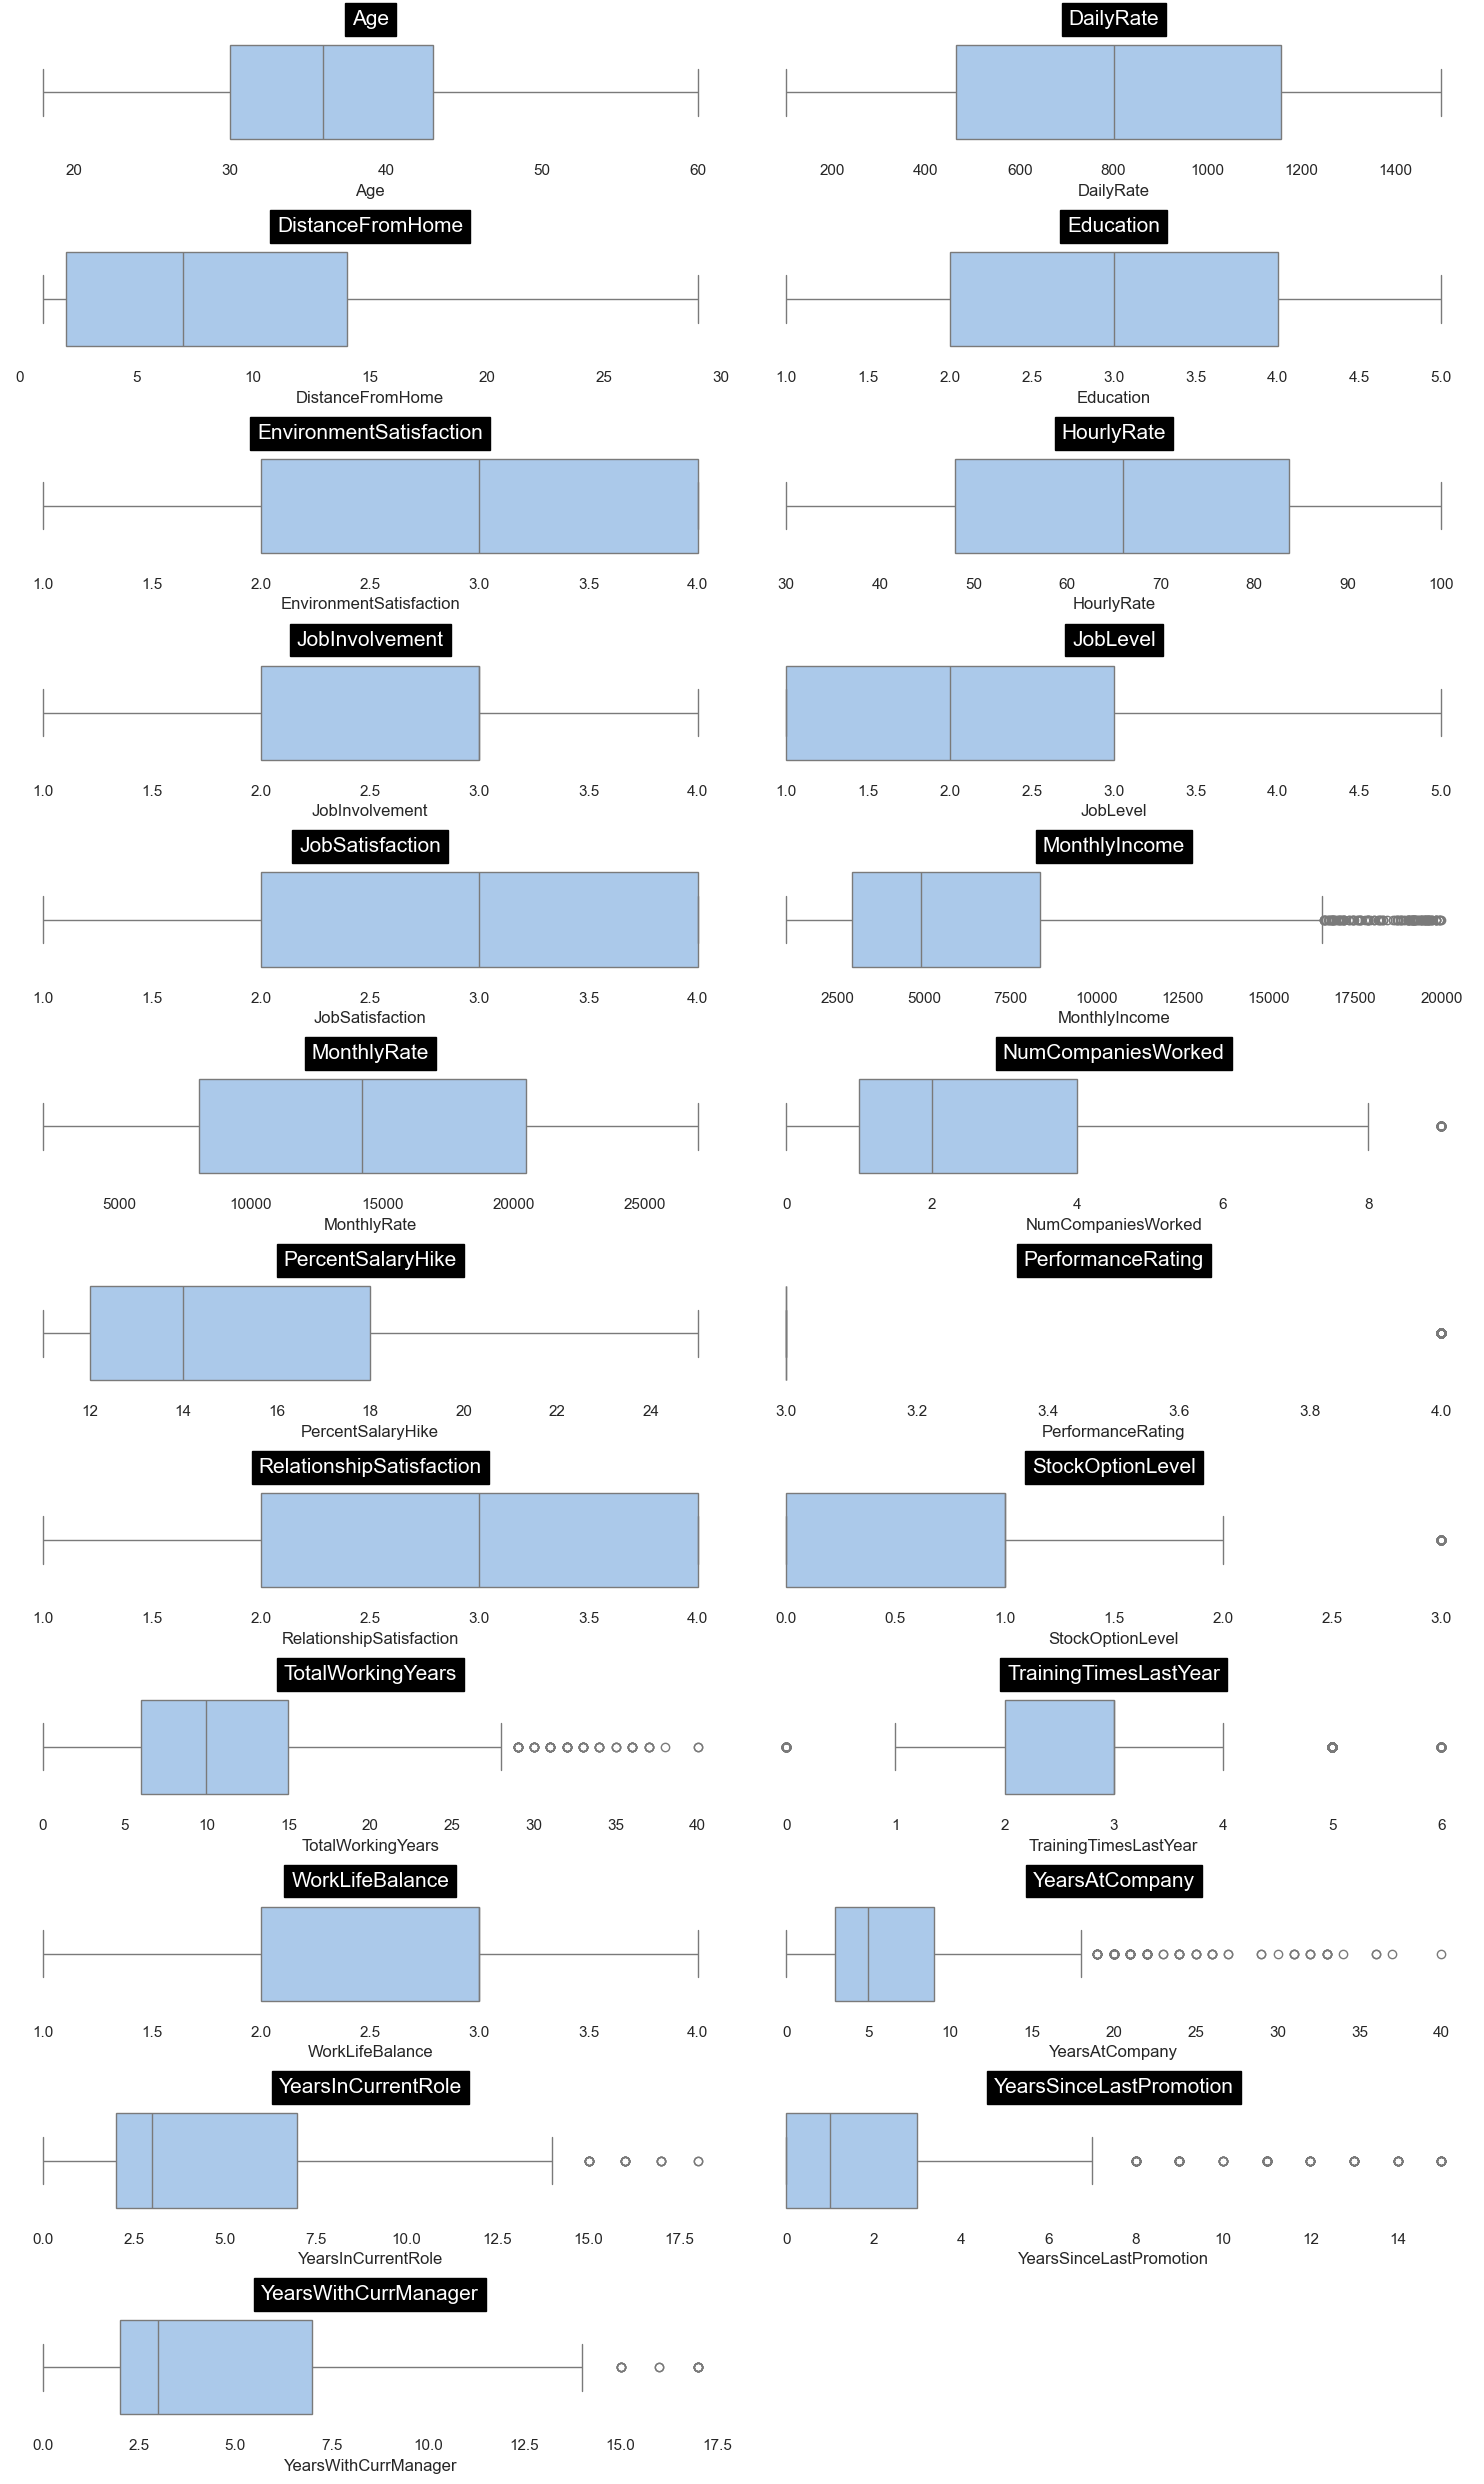

In [23]:
plt.figure(figsize = (15,25))
for idx, i in enumerate(num):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, data = df)
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()                     
plt.show()

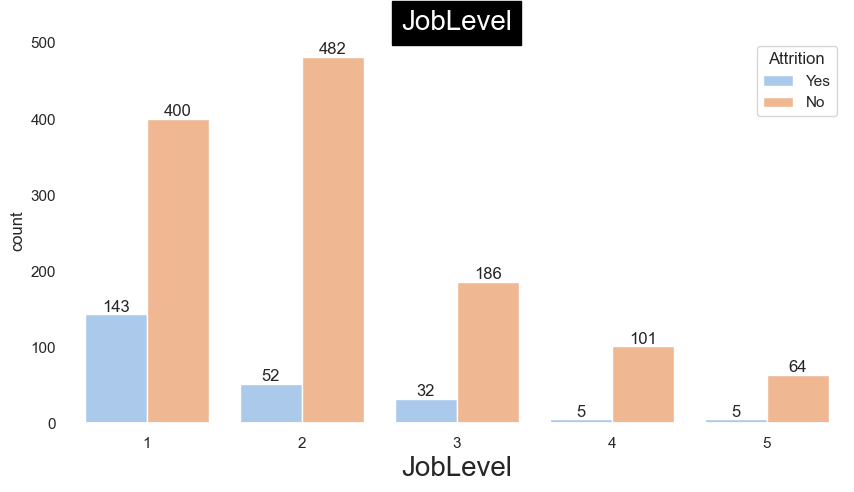

In [24]:
plt.figure(figsize=(10,5))

ax = sns.countplot(x=df['JobLevel'], data=df,hue="Attrition")
for container in ax.containers:
        ax.bar_label(container)
plt.title('JobLevel',backgroundcolor='black',color='white',fontsize=20)
plt.xlabel('JobLevel',fontsize=20)
plt.grid()
plt.show()

<Figure size 500x1000 with 0 Axes>

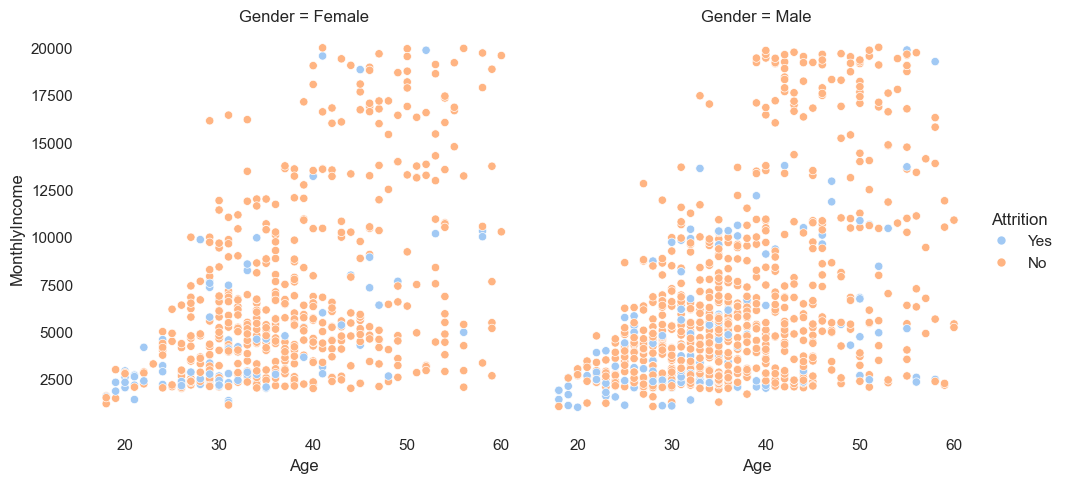

In [25]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Age", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

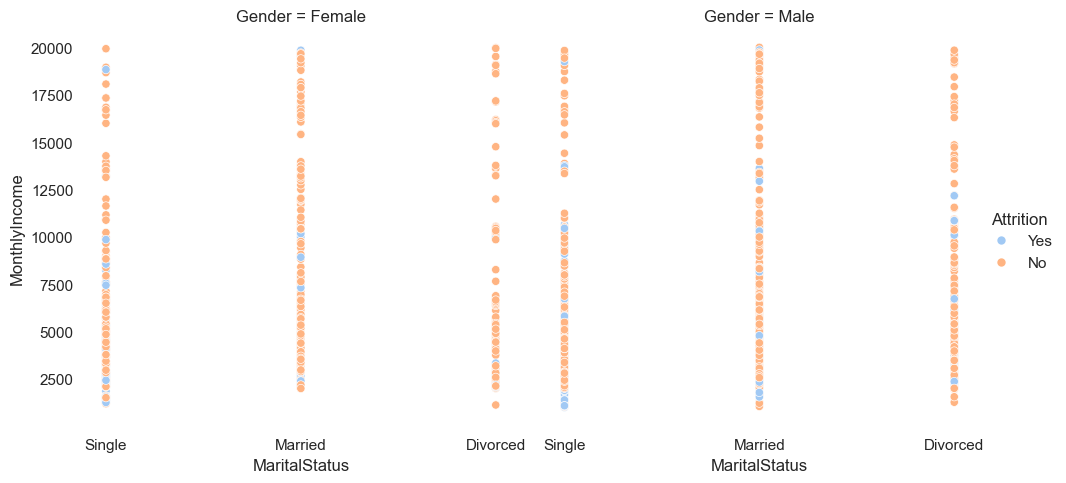

In [26]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="MaritalStatus", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

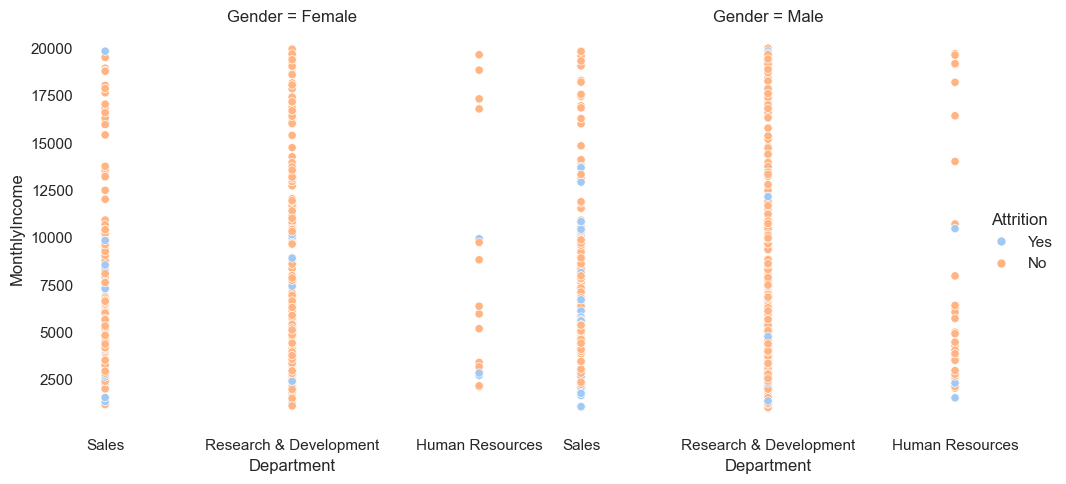

In [27]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Department", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

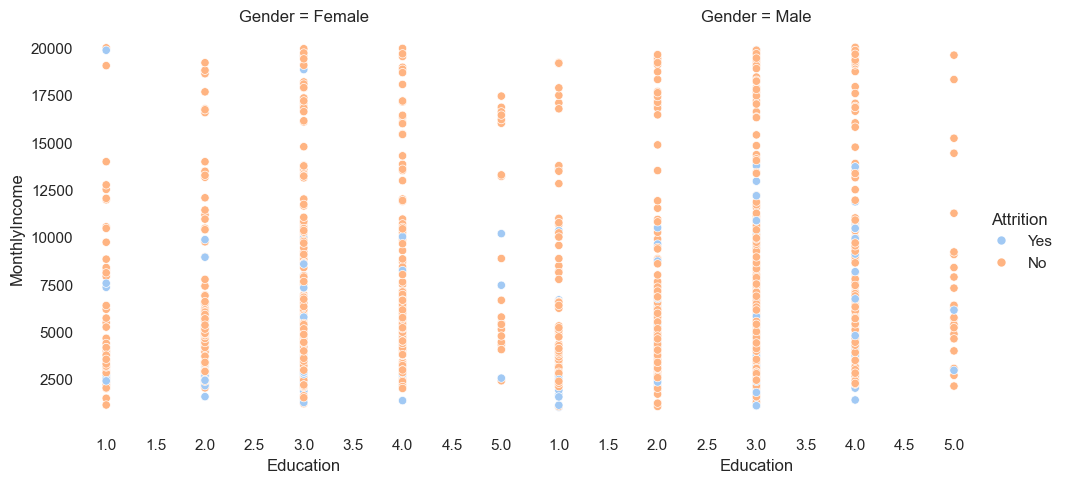

In [28]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Education", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

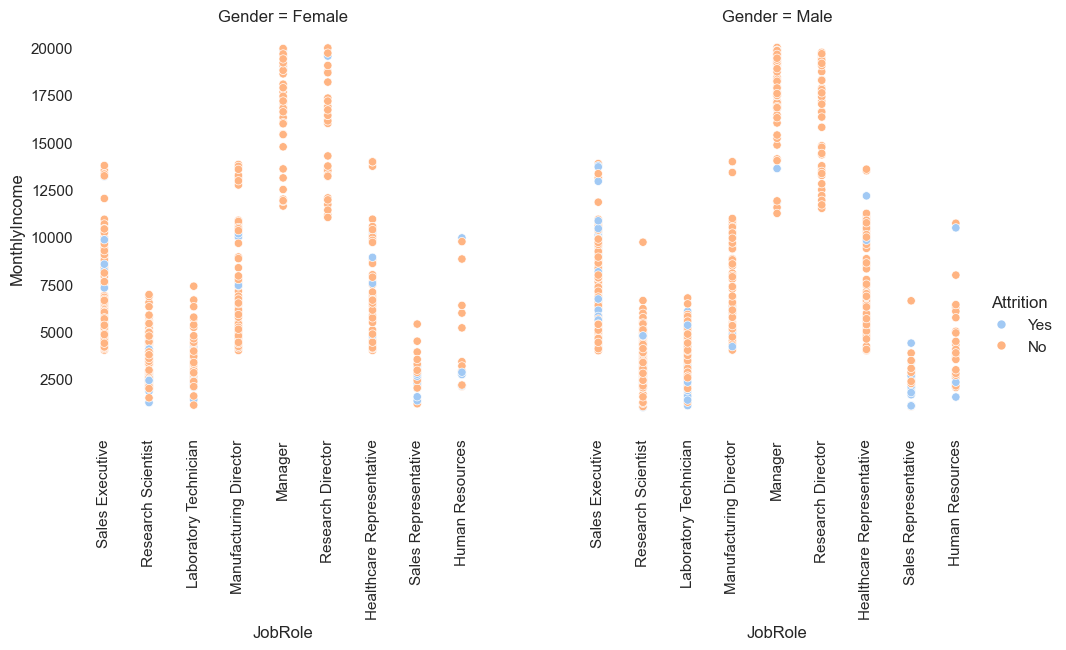

In [29]:
plt.figure(figsize=(5,10))
ax=sns.relplot(data=df, y="MonthlyIncome", x="JobRole", hue="Attrition",col='Gender')
rotation = 90 
for i, ax in enumerate(ax.fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
#plt.xticks(rotation=90)
plt.show()

<Figure size 500x1000 with 0 Axes>

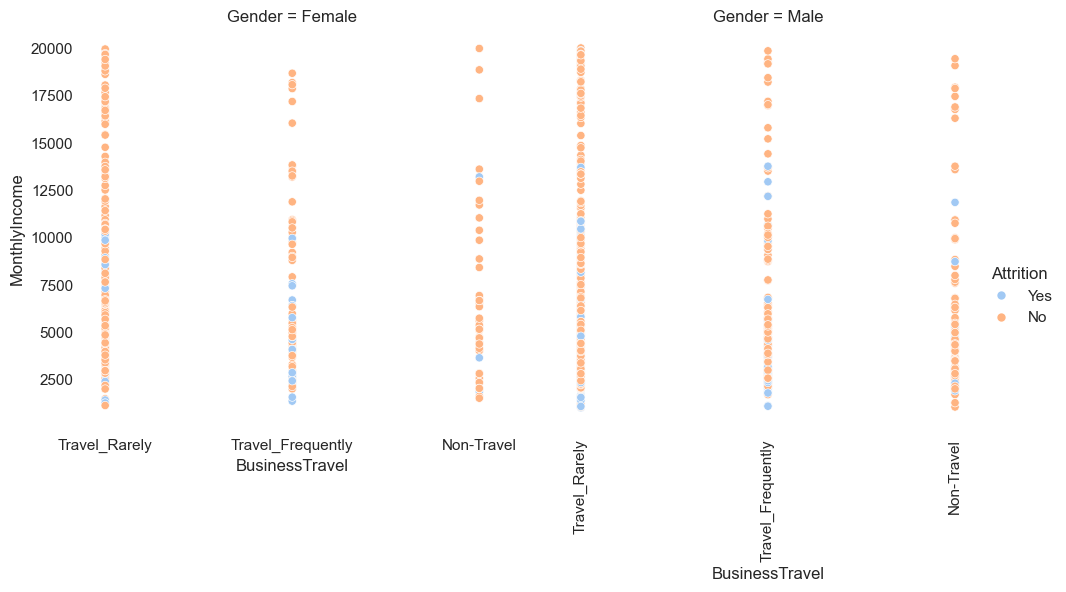

In [30]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="BusinessTravel", hue="Attrition",col='Gender')
plt.xticks(rotation=90)
plt.show()

# We noticed:
- Attrition is the highest for both men and women from 18 to 35 years of age and gradually decreases.
- As income increases, attrition decreases.
- Attrition is much, much less in divorced women.
- Attrition is higher for employees who usually travel than others, and this rate is higher for women than for men.
- Attrition is the highest for those in level 1 jobs.
- Women with the job position of manager, research director and technician laboratory have almost no attrition.
- Men with the position of sales expert have a lot of attrition.

# Cap ouliers (IQR method)

In [33]:
df_capped = df.copy()

# Features to cap
features = [
    'MonthlyIncome', 
    'TotalWorkingYears', 
    'YearsAtCompany', 
    'YearsSinceLastPromotion', 
    'YearsInCurrentRole', 
    'YearsWithCurrManager'
]

# Apply IQR Capping
for feature in features:
    Q1 = df_capped[feature].quantile(0.25)
    Q3 = df_capped[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values outside the IQR range
    df_capped[feature] = df_capped[feature].clip(lower=lower_bound, upper=upper_bound)

    print(f"Capped '{feature}' to range [{lower_bound:.2f}, {upper_bound:.2f}]")

# Final shape after capping
print(df_capped.shape)

Capped 'MonthlyIncome' to range [-5291.00, 16581.00]
Capped 'TotalWorkingYears' to range [-7.50, 28.50]
Capped 'YearsAtCompany' to range [-6.00, 18.00]
Capped 'YearsSinceLastPromotion' to range [-4.50, 7.50]
Capped 'YearsInCurrentRole' to range [-5.50, 14.50]
Capped 'YearsWithCurrManager' to range [-5.50, 14.50]
(1470, 31)


In [34]:
# we will get a copy (before encoding)
df_copy = df_capped.copy()

In [35]:
# Label encoding to all
label_encoders = {}
for col in df_copy.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])
    label_encoders[col] = le
    
    print(col)
    for index, label in enumerate(le.classes_):
        print(f"{index} >> {label}")

Attrition
0 >> No
1 >> Yes
BusinessTravel
0 >> Non-Travel
1 >> Travel_Frequently
2 >> Travel_Rarely
Department
0 >> Human Resources
1 >> Research & Development
2 >> Sales
EducationField
0 >> Human Resources
1 >> Life Sciences
2 >> Marketing
3 >> Medical
4 >> Other
5 >> Technical Degree
Gender
0 >> Female
1 >> Male
JobRole
0 >> Healthcare Representative
1 >> Human Resources
2 >> Laboratory Technician
3 >> Manager
4 >> Manufacturing Director
5 >> Research Director
6 >> Research Scientist
7 >> Sales Executive
8 >> Sales Representative
MaritalStatus
0 >> Divorced
1 >> Married
2 >> Single
OverTime
0 >> No
1 >> Yes


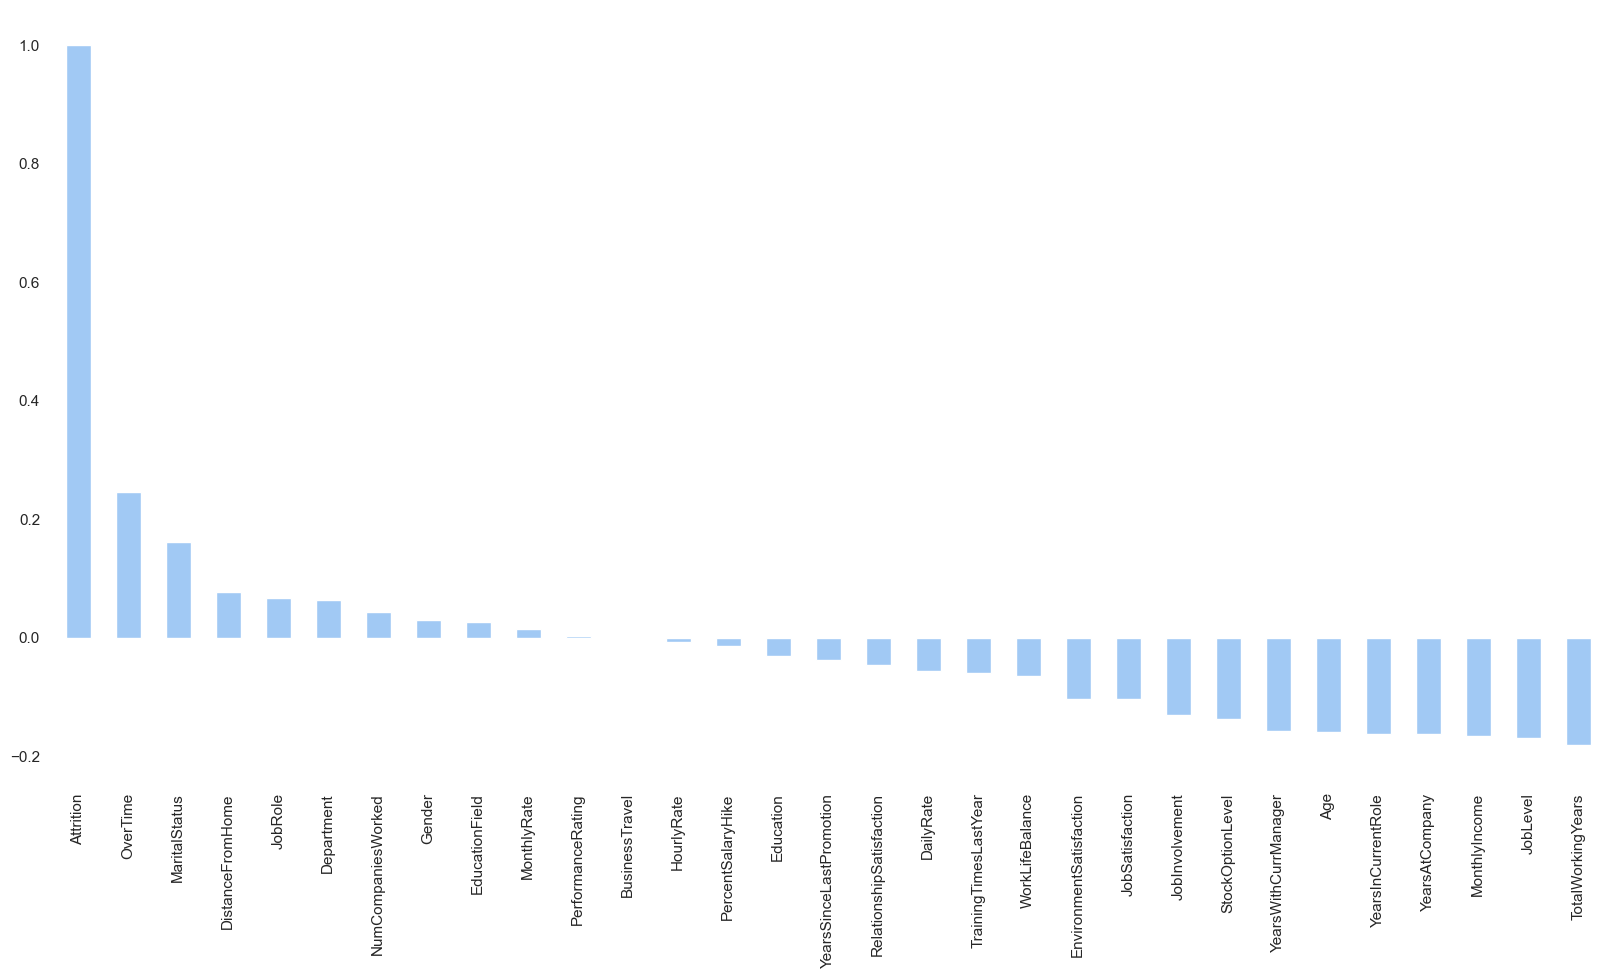

In [36]:
#Plot correlation between features and Tearget
plt.figure(figsize=(20,10))
correlations=df_copy.corr()
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');


In [37]:
# Calculate correlation matrix
correlations = df_copy.corr()

# Get features where correlation with 'Attrition' is less than 0.15 (weak correlation)
low_corr_features = correlations['Attrition'][abs(correlations['Attrition']) < 0.15].index

# Drop those low-correlation features from the dataset
df_filtered = df_copy.drop(columns=low_corr_features)

# list of dropped columns
print(list(low_corr_features))


['BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion']


In [38]:
df_filtered.head()

,Age,Attrition,JobLevel,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,2,5993,1,8.0,6,4.0,5.0
1,49,0,2,1,5130,0,10.0,10,7.0,7.0
2,37,1,1,2,2090,1,7.0,0,0.0,0.0
3,33,0,1,1,2909,1,8.0,8,7.0,0.0
4,27,0,1,1,3468,0,6.0,2,2.0,2.0


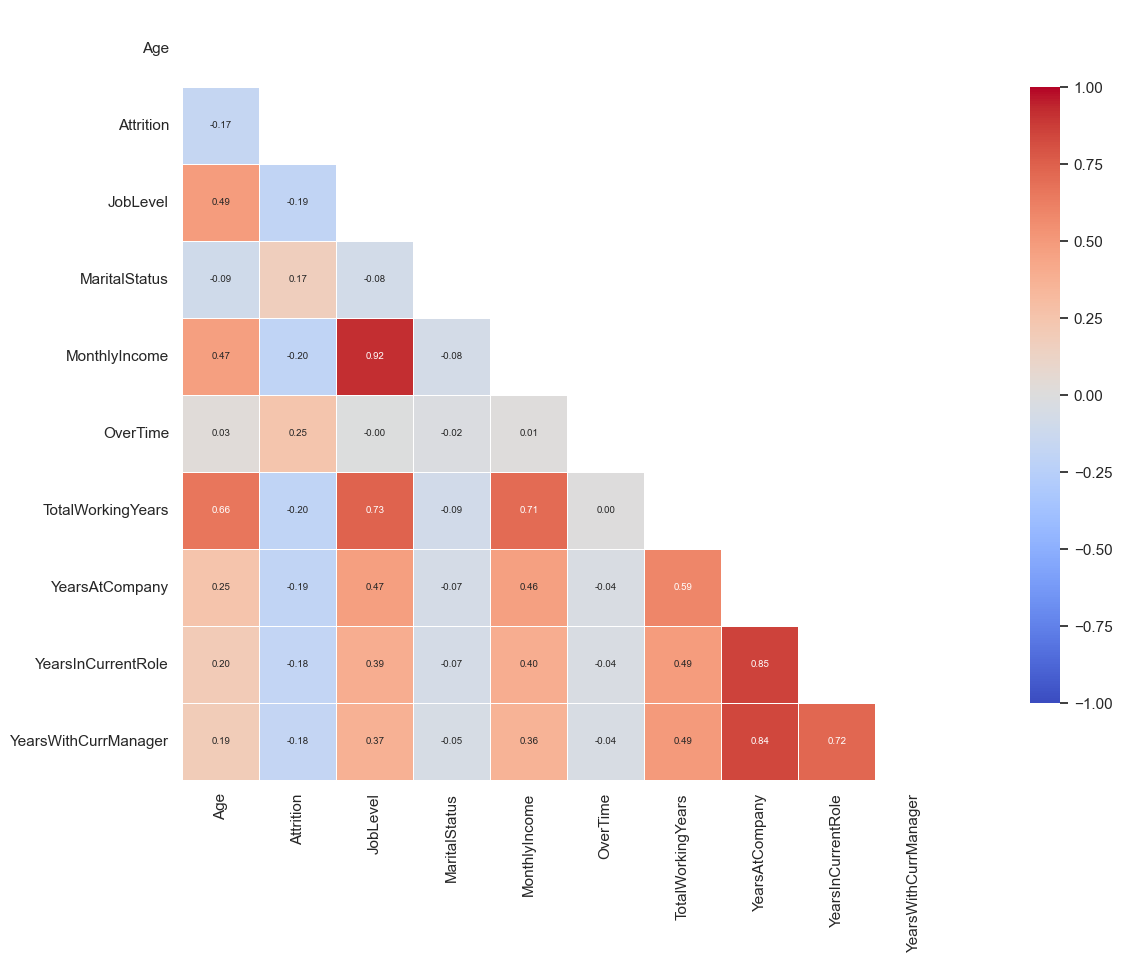

In [39]:
# Heat map
corr = df_filtered.corr(method="spearman")
sns.set(style="white")

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap with default colors
plt.figure(figsize=(20, 10), dpi=100)
sns.heatmap(corr, mask=mask, cmap="coolwarm", vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, annot=True, fmt=".2f",annot_kws={"size": 7})

plt.show()


### There are high correlation between features: ( monthlyincome & joblevel )

In [41]:
# Due to high corr in heatmap
df_filtered = df_filtered.drop(['MonthlyIncome'],axis=1)

# Machine Learning

In [43]:
DF = df_filtered.copy()

In [44]:
DF.head()

,Age,Attrition,JobLevel,MaritalStatus,OverTime,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,2,1,8.0,6,4.0,5.0
1,49,0,2,1,0,10.0,10,7.0,7.0
2,37,1,1,2,1,7.0,0,0.0,0.0
3,33,0,1,1,1,8.0,8,7.0,0.0
4,27,0,1,1,0,6.0,2,2.0,2.0


In [45]:
DF.head()

,Age,Attrition,JobLevel,MaritalStatus,OverTime,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,2,1,8.0,6,4.0,5.0
1,49,0,2,1,0,10.0,10,7.0,7.0
2,37,1,1,2,1,7.0,0,0.0,0.0
3,33,0,1,1,1,8.0,8,7.0,0.0
4,27,0,1,1,0,6.0,2,2.0,2.0


In [46]:
X = DF.drop('Attrition', axis=1)
Y = DF['Attrition']

In [47]:
x_train , x_test , y_train, y_test = train_test_split (X ,Y ,test_size=0.2, stratify=Y, random_state=42)

In [48]:
pd.Series(y_train.squeeze()).value_counts()

Attrition
0    986
1    190
Name: count, dtype: int64

<Axes: xlabel='Attrition', ylabel='count'>

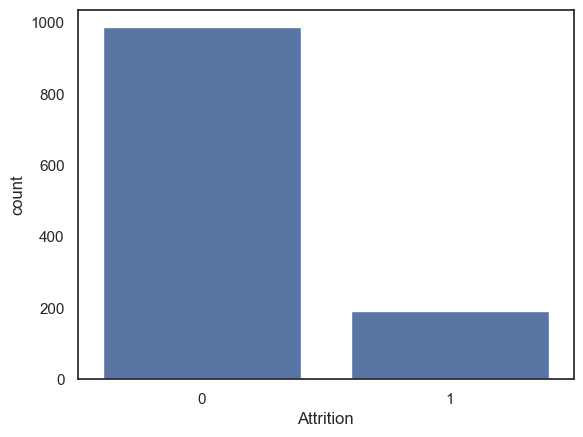

In [49]:
sns.countplot(x=y_train.squeeze())

# Balancing

In [51]:
# SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=1, random_state=42)
x_train_s, y_train_s = smote.fit_resample(x_train, y_train)

In [52]:
pd.Series(y_train_s).value_counts()

Attrition
0    986
1    986
Name: count, dtype: int64

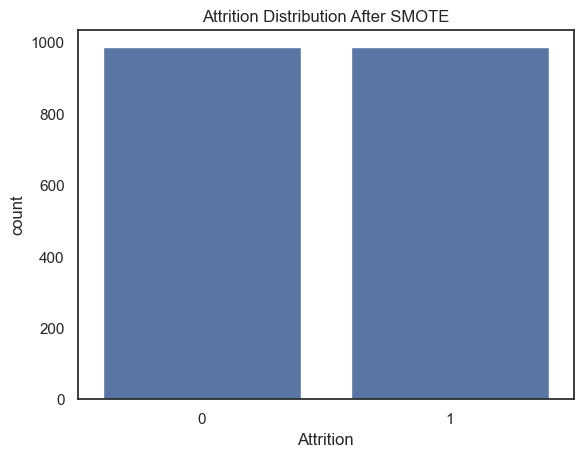

In [53]:
sns.countplot(x=y_train_s)
plt.title('Attrition Distribution After SMOTE')
plt.show()

# Models

# 1. LogisticRegression

In [56]:
from sklearn.linear_model import LogisticRegression 

log_reg=LogisticRegression()
log_reg.fit(x_train_s, y_train_s)
y_pred_lg = log_reg.predict(x_test)

print ('accuracy:',metrics.accuracy_score(y_test, y_pred_lg))

accuracy: 0.6258503401360545


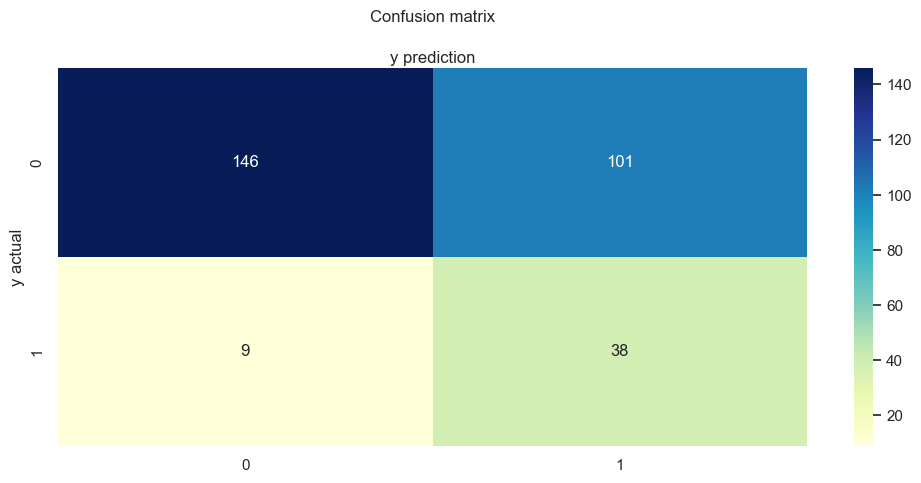

              precision    recall  f1-score   support

           0       0.94      0.59      0.73       247
           1       0.27      0.81      0.41        47

    accuracy                           0.63       294
   macro avg       0.61      0.70      0.57       294
weighted avg       0.84      0.63      0.68       294



In [57]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred_lg)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_lg),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(classification_report(y_test, y_pred_lg))

# 2. DecisionTree

In [59]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_s, y_train_s)
dt_pred = dt.predict(x_test)

print('Accuracy:', accuracy_score(y_test, dt_pred))

Accuracy: 0.9421768707482994


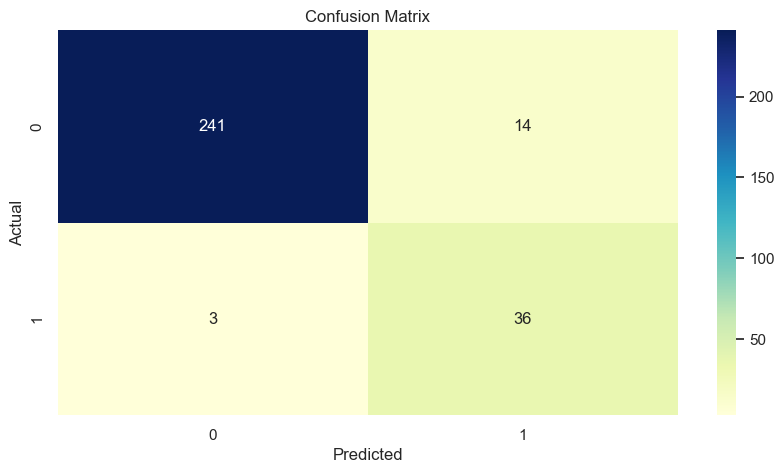

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       255
           1       0.72      0.92      0.81        39

    accuracy                           0.94       294
   macro avg       0.85      0.93      0.89       294
weighted avg       0.95      0.94      0.95       294



In [60]:
plt.figure(figsize=(10, 5))
cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, dt_pred))

# 3. RandomForest

In [62]:
# RandomForest & GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(class_weight='balanced'),
                    param_grid,
                    cv=5,
                    scoring='f1')

grid.fit(x_train_s, y_train_s)

print("Best Parameters:", grid.best_params_)
print("Best CV f1:", grid.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV f1: 0.8780439896268639


In [63]:
# Use best model on test data
y_pred = grid.best_estimator_.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.9625850340136054


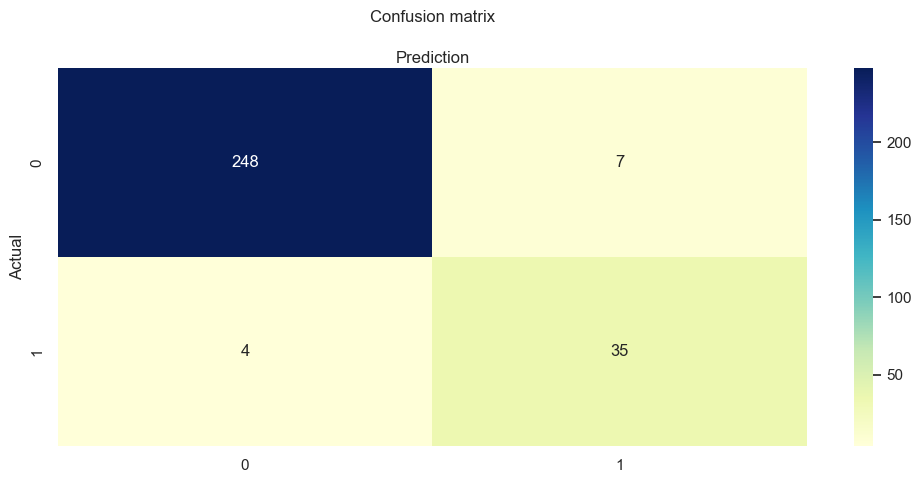

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       255
           1       0.83      0.90      0.86        39

    accuracy                           0.96       294
   macro avg       0.91      0.93      0.92       294
weighted avg       0.96      0.96      0.96       294



In [64]:
fig, ax = plt.subplots(figsize=(10,5)) 
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))

# 4. Gradient Boosted

In [66]:
from sklearn.ensemble import  GradientBoostingClassifier

seed=0
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0}


gb = GradientBoostingClassifier(**gb_params)
gb.fit(x_train_s, y_train_s)

gb_pred = gb.predict(x_test)
print('accuracy:',metrics.accuracy_score(y_test, gb_pred))

accuracy: 0.9523809523809523


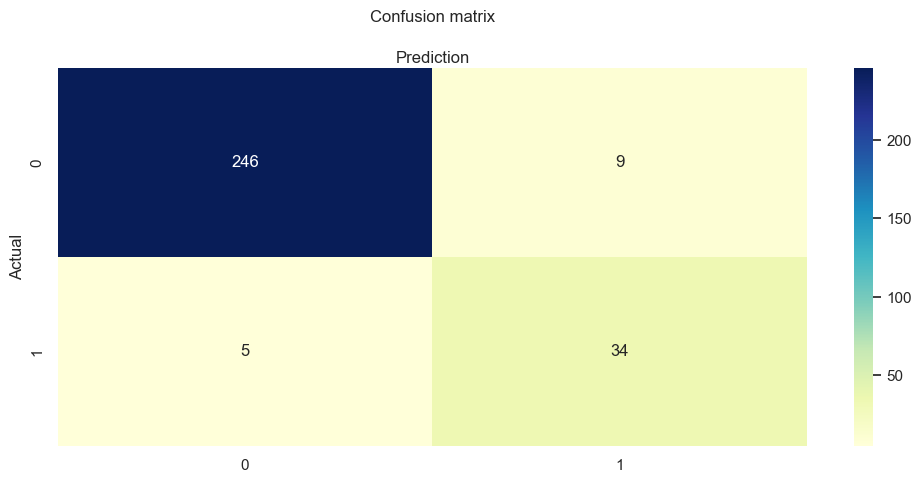

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       255
           1       0.79      0.87      0.83        39

    accuracy                           0.95       294
   macro avg       0.89      0.92      0.90       294
weighted avg       0.95      0.95      0.95       294



In [67]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,gb_pred)
sns.heatmap(metrics.confusion_matrix(y_test,gb_pred),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, gb_pred))

### modeling was done with four machine learning methods, and the best model was :<h3 align="left"><font color=red> RandomForest</font></h3>

In [124]:
'''import pickle
# Save the trained model as a pkl file
with open("grid.pkl", "wb") as file:
    pickle.dump(grid, file)'''

In [70]:
#My_Inputs
X.columns

Index(['Age', 'JobLevel', 'MaritalStatus', 'OverTime', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')